<div style="background: #fceabb;background: linear-gradient(to right, #f8b500, #fceabb);/*height:70px;*/">
<br />
<h1 style="font-size:20px;font-weight:700;color:white;text-align:center;">Helper functions - Overview Tool for Data Analysis</h1>
<br />
<br />
</div>

## Overview plot

In [2]:
def plot_overview(data, cols, target_col):
    '''
    Return as many scatterplots as variable in 'cols' depending on the chosen target column 'target_col'.
    To adapt the output, you can modify the figinline parameter (set on 4 graphs / row), the figsize or
    spaces between the graphs in plt.subplots_adjust(...).
    
    >>> train_df = pd.read_csv('../house_prices_data.csv')
    >>> plot_overview(train_df, train_df.columns.to_list(), 'SalePrice')
    
    '''
    fig_inline = 4 # set the number of graphs per row you want
    n_rows = (len(cols) // fig_inline) + 1 # give the number of row we will need
    f, ax = plt.subplots(n_rows, fig_inline, figsize = (15,3 * n_rows)) # set the figure
    
    place = 0 # give the place of the graphs, if fig_inline = 4, it will be 4 places [0, 1, 2, 3]
    row = 0 # give the row of the graphs. We add one to row on every 'tour' (given by fig_inline). Every 4 graphs here.
    for col in cols:
        plt.subplots_adjust(left = 0.125, right = 0.9, bottom = 0.1, top = 0.9, wspace = 0.5, hspace = 0.5) # adjust margins, etc thanks to these parameters
        # this if statement verifies the graph place. If the graph is on the 4th place, then new 'tour'(= new row). 
        if place // 3 != 1 :
            sns.scatterplot(x=col, y=target_col, data=data, ax = ax[row, place])
            place += 1
        else:
            sns.scatterplot(x=col, y=target_col, data=data, ax = ax[row, place])
            place = 0
            row += 1


## Overview table

In [19]:
def extract_overview(data):
    '''
    Return 3 lists from your data: 
    - a list with the column names
    - a list of list with the different values existing for each columns
    - a list of list with the counts of existing values for each columns
    
    >>> train_df = pd.read_csv('../house_prices_data.csv')
    >>> col_names, col_values, col_count = extract_overview(train_df)
    '''
    col_names = data.columns.to_list() # give the list of columns of our data
    col_values = [] # initialize the list to host our col_values
    col_count = [] # initialize the list to host our col_count
    for col in col_names:
        col_values.append(data[col].value_counts().index.to_list())
        col_count.append(data[col].value_counts().to_list())
    
    return col_names, col_values, col_count

def standardize_overview(data):
    '''
    Note: This function include the function extract_overview(data).
    
    Return an equal number of elements for our two lists (col_values and col_count). 
    This step will make it possible to display the columns in a dataframe.
    The character to fill by default is a point '.'. You can change it in 'filled_character'.
    
    >>> train_df = pd.read_csv('../house_prices_data.csv')
    >>> col_values, col_count = standardise(train_df)
    
    '''
    col_values = extract_overview(data)[1] # extract col_values from our data
    col_count = extract_overview(data)[2] # extract col_count from our data
    max_row = max([len(items) for items in col_values]) # give the maximum lenght from our list in order to standardize the other lists on this lenght
    filled_character = '.' #this is the character that will fill the values up to the lenght to be reached.
    # let's start the operation for col_values
    for items in col_values:
        if len(items) < max_row:
            how_much_to_fill = max_row - len(items)
            items.extend(filled_character * how_much_to_fill)
    # and again for col_count
    for items in col_count:
        if len(items) < max_row:
            how_much_to_fill = max_row - len(items)
            items.extend(filled_character * how_much_to_fill)
    
    return col_values, col_count

def dataframe_overview(data):
    '''
    Note: This function include the functions extract_overview(data) and standardize_overview(data).
    
    Returns a dataframe with the different existing values for each of the columns, their frequencies and their prevalences.
    !One of the for loop is set on filled_character from standardize_overview(data) function. The choosen filled_character here is '.'.
    !If you want to change 'filled_character', change it for both.
    
    >>> train_df = pd.read_csv('../house_prices_data.csv')
    >>> df_overview = dataframe_overview(train_df)
    
    #extract = extract_overview(data)
    #col_names, col_values, col_count = extract[0], extract[1], extract[2]
    
    '''
    df_overview = pd.DataFrame() # create the dataframe
    len_data = len(data) # give the lenght of data for calculate percentage of col_count
    col_names, col_values, col_count = extract_overview(data) # apply our extract function
    col_values, col_count = standardize_overview(data) # apply our standardize function
    
    col_to_display = [] # this will be a list of lists 'generated' by col_generator below. It combines col_values and col_count into one list with a nice format.
    # for each columns of data (1rst loop), loop for as many rows existing (2nd loop)
    for i in range(len(col_values)):
        col_generator = []
        for j in range(len(col_values[0])):
            # this if statement is needed to calculate the percent. Because filled_character values are not a count.
            if col_count[i][j] != '.':
                percent = '%.2f' % ((col_count[i][j] / len_data)*100)
            else:
                percent = ''
            # append our customized expression using f-strings ex: Tabular [32 = 18%]. Tabular is a type of value, 32 its occurences, 18% its prevalence.
            col_generator.append(f'{col_values[i][j]} [{col_count[i][j]} = {percent}%]')
        # each time a column is 'scanned', append the filled list col_generator to our col_to_display list. And then start an other 'for i' loop. 
        col_to_display.append(col_generator)
    # now our two lists are col_names and col_to_display. Let's fill our dataframe 'df_overview'
    col_index = 0
    for col in col_to_display:
        df_overview[col_names[col_index]] = col
        col_index += 1
    
    return df_overview

<div style="background: #fceabb;background: linear-gradient(to right, #f8b500, #fceabb);/*height:70px;*/">
<br />
<h1 style="font-size:20px;font-weight:700;color:white;text-align:center;">Helper functions - Examples</h1>
<br />
<br />
</div>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
path = '...'

In [8]:
train_df = pd.read_csv(path + '/house_prices_data.csv')

## Overview plot (example)
Data : House Prices ([Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques))

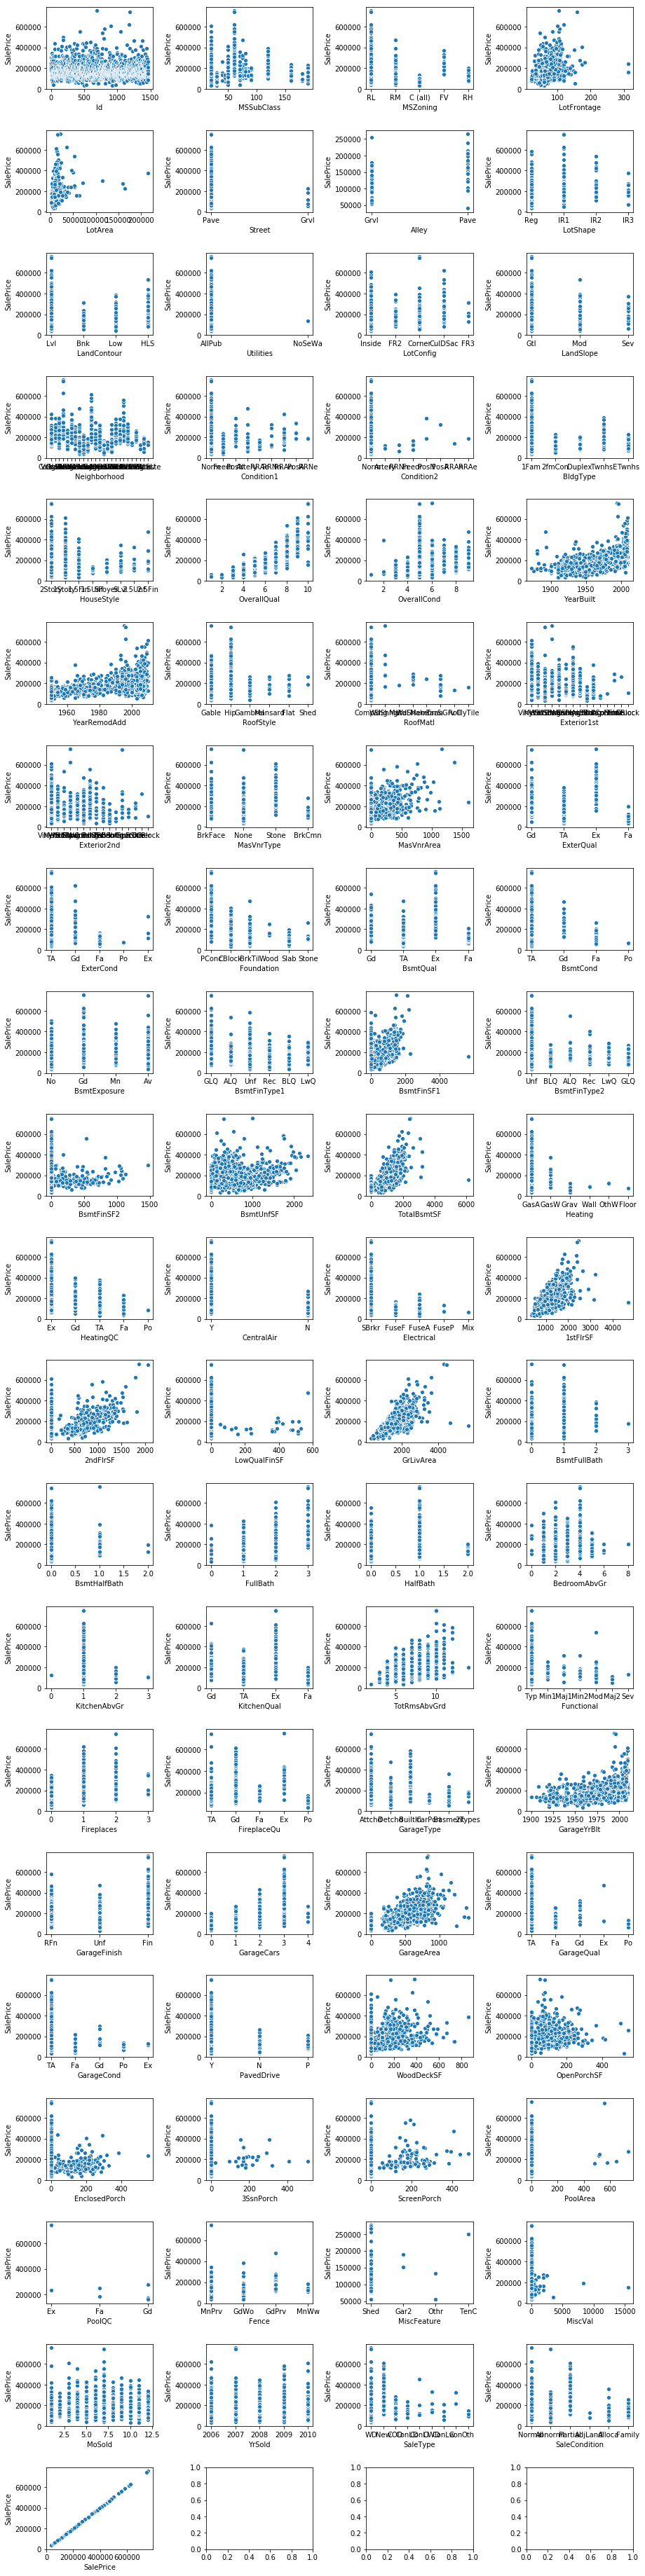

In [9]:
plot_overview(train_df, train_df.columns.to_list(), 'SalePrice')

## Overview table


In [27]:
# len(extract_overview(train_df)) = 3 --> col_names, col_values, col_count
# len(standardize_overview(train_df)) = 2 --> col_values, col_count

In [28]:
df_overview = dataframe_overview(train_df)
df_overview.iloc[:5,:5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea
0,1460 [1 = 0.07%],20 [536 = 36.71%],RL [1151 = 78.84%],60.0 [143 = 9.79%],7200 [25 = 1.71%]
1,479 [1 = 0.07%],60 [299 = 20.48%],RM [218 = 14.93%],70.0 [70 = 4.79%],9600 [24 = 1.64%]
2,481 [1 = 0.07%],50 [144 = 9.86%],FV [65 = 4.45%],80.0 [69 = 4.73%],6000 [17 = 1.16%]
3,482 [1 = 0.07%],120 [87 = 5.96%],RH [16 = 1.10%],50.0 [57 = 3.90%],10800 [14 = 0.96%]
4,483 [1 = 0.07%],30 [69 = 4.73%],C (all) [10 = 0.68%],75.0 [53 = 3.63%],9000 [14 = 0.96%]
